In [1]:
%load_ext memory_profiler

import numpy as np

import scipy
import scipy.sparse as sparse
import scipy.io as io

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.metrics import f1_score, silhouette_score, silhouette_samples

from openTSNE import TSNE

from fastrna.core import *

## FastRNA

In [2]:
mtx = io.mmread('/data01/hanbin973/fastrna_paper/datasets/pbmc_ssc/mat.mtx').astype(np.float32).tocsc()
meta = pd.read_csv('/data01/hanbin973/fastrna_paper/datasets/pbmc_ssc/meta.csv', index_col=0)

In [3]:
# sort data by batch
batch_label = pd.factorize(meta.Method)[0]
idx_reorder = batch_label.argsort()
blab_reorder = batch_label[idx_reorder]
ct_reorder = meta.CellType.values[idx_reorder]
mtx_reorder = mtx[:,idx_reorder]

In [4]:
%time gene_vars = fastrna_hvg(mtx_reorder)
gene_order_var = gene_vars.argsort()[::-1]
mtx_hvg = mtx_reorder[gene_order_var[:3000],:] 
mtx_hvg.sort_indices()
numi = np.asarray(mtx_reorder.sum(axis=0)).ravel()
%time eig_val, eig_vec, pca, rrt = fastrna_pca(mtx_hvg, numi)
name = 'pbmcssc'
pd.DataFrame(pca).to_csv('pca_coord/%s/pca_fr_nobatch.csv' % name)

CPU times: user 1.85 s, sys: 167 ms, total: 2.01 s
Wall time: 79.9 ms
CPU times: user 39.1 s, sys: 14.9 s, total: 54 s
Wall time: 1.24 s


In [5]:
meta = pd.read_csv('../datasets/pbmc_ssc/meta.csv', index_col=0)

# sort data by batch
batch_label = pd.factorize(meta.Method)[0]
idx_reorder = batch_label.argsort()
blab_reorder = batch_label[idx_reorder]
ct_reorder = meta.CellType.values[idx_reorder]

name = 'pbmcssc'
pca_glmpca = pd.read_csv('../fastrna_r/pca_coord/%s/pca_glmpca_nobatch.csv' % name, index_col=0).values[idx_reorder,:]
pca_logpca = pd.read_csv('../fastrna_r/pca_coord/%s/pca_log_nobatch.csv' % name, index_col=0).values[idx_reorder,:]
pca_fr = pd.read_csv('pca_coord/%s/pca_fr_nobatch.csv' % name, index_col=0).values



In [6]:
sils = []
Xs = [pca_glmpca[:,:50], pca_logpca[:,:50], pca_fr]
labels = [ct_reorder] * len(Xs)

for X, lab in zip(Xs, labels):
    sils.append(silhouette_samples(X, lab, metric='cosine'))
sils

[array([ 0.20523463,  0.47912376,  0.56094233, ..., -0.06450782,
         0.39066581, -0.14917778]),
 array([0.19406228, 0.56535053, 0.71092146, ..., 0.15608468, 0.45372244,
        0.03166909]),
 array([ 0.53986804,  0.90125933,  0.90595914, ...,  0.65723928,
         0.49645794, -0.0665501 ])]

In [7]:
scores =[]
for X, lab in zip(Xs, labels):
    labels = pd.factorize(lab)[0]
    k=5
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, labels, cv=5, scoring='accuracy')
    scores.append(score)
    
scores

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe49d04b1f0>
Traceback (most recent call last):
  File "/home/hanbin973/anaconda3/envs/fastrna_test/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hanbin973/anaconda3/envs/fastrna_test/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hanbin973/anaconda3/envs/fastrna_test/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hanbin973/anaconda3/envs/fastrna_test/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
/home/hanbin973/anaconda3/envs/fastrna_test/

/home/hanbin973/anaconda3/envs/fastrna_test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe49d04bb80>
Traceback (most recent call last):
  File "/home/hanbin973/anaconda3/envs/fastrna_test/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hanbin973/anaconda3/envs/fastrna_t

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe49d04bc10>
Traceback (most recent call last):
  File "/home/hanbin973/anaconda3/envs/fastrna_test/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hanbin973/anaconda3/envs/fastrna_test/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hanbin973/anaconda3/envs/fastrna_test/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hanbin973/anaconda3/envs/fastrna_test/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
/home/hanbin973/anaconda3/envs/fastrna_test/

[array([0.92252803, 0.91840898, 0.90617032, 0.92044875, 0.94390617]),
 array([0.9235474 , 0.92707802, 0.9163692 , 0.94798572, 0.94237634]),
 array([0.89704383, 0.91024987, 0.87863335, 0.92299847, 0.92146864])]

In [8]:
sils_b = []
Xs = [pca_glmpca[:,:50], pca_logpca[:,:50], pca_fr]
labels = [blab_reorder] * len(Xs)
for X, lab in zip(Xs, labels):
    sils_b.append(silhouette_samples(X, lab, metric='cosine'))
sils_b

[array([0.10023155, 0.09142011, 0.09226531, ..., 0.20734903, 0.35452548,
        0.20217411]),
 array([0.07144746, 0.06183245, 0.02166296, ..., 0.1209114 , 0.22287207,
        0.03682859]),
 array([ 0.09134976,  0.06436396,  0.057667  , ..., -0.00696081,
         0.28526958, -0.08077446])]

In [9]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
%config InlineBackend.figure_formats = ['svg']

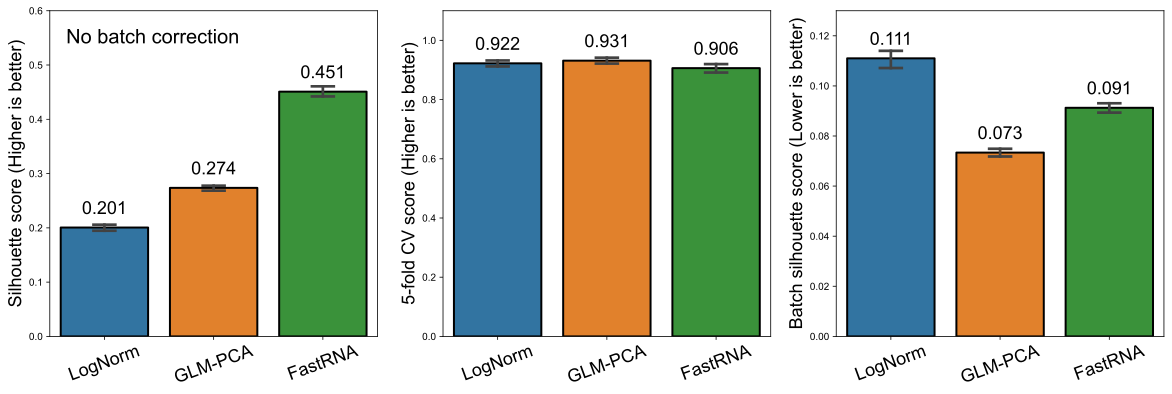

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))

df = pd.DataFrame(np.array(sils).T, columns=['LogNorm', 
                                               'GLM-PCA',
                                            'FastRNA'])
df_melt = pd.melt(df, var_name='Method', value_name='Silhouette score')    
sns.barplot(x='Method', y='Silhouette score', data=df_melt, ax=ax[0],
           edgecolor='black', linewidth=2, capsize=.2, estimator=np.median)

ax[0].set_xlabel(ax[0].get_xlabel(), fontsize=20)
ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=18, rotation=20)

ax[0].set_ylabel(ax[0].get_ylabel() + ' (Higher is better)', fontsize=18)

ax[0].bar_label(ax[0].containers[0], fontsize=18, padding=10, fmt='%.3f')
ax[0].set_ylim([0,0.6])
ax[0].set_title('', fontsize=18, va='bottom')
ax[0].set_xlabel('')
ax[0].text(0.05, 0.9, 'No batch correction', fontsize=20, transform=ax[0].transAxes)

df = pd.DataFrame(np.array(scores).T, columns=['LogNorm', 
                                               'GLM-PCA',
                                              'FastRNA'])
df_melt = pd.melt(df, var_name='Method', value_name='5-fold CV score')        
sns.barplot(x='Method', y='5-fold CV score', data=df_melt, ax=ax[1],
           edgecolor='black', linewidth=2, capsize=.2)

ax[1].set_xlabel(ax[1].get_xlabel(), fontsize=20)
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=18, rotation=20)

ax[1].set_ylabel(ax[1].get_ylabel() + ' (Higher is better)', fontsize=18)

ax[1].bar_label(ax[1].containers[0], fontsize=18, padding=10, fmt='%.3f')
ax[1].set_ylim([0,1.1])
ax[1].set_title('', fontsize=18, va='bottom')
ax[1].set_xlabel('')

df = pd.DataFrame(np.abs(np.array(sils_b).T), columns=['LogNorm', 
                                               'GLM-PCA',
                                                      'FastRNA'])
df_melt = pd.melt(df, var_name='Method', value_name='Batch silhouette score')        
sns.barplot(x='Method', y='Batch silhouette score', data=df_melt, ax=ax[2],
           edgecolor='black', linewidth=2, capsize=.2, estimator=np.median)

ax[2].set_xlabel(ax[2].get_xlabel(), fontsize=20)
ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=18, rotation=20)

ax[2].set_ylabel(ax[2].get_ylabel() + ' (Lower is better)', fontsize=18)

ax[2].bar_label(ax[2].containers[0], fontsize=18, padding=10, fmt='%.3f')
ax[2].set_ylim([0,0.13])
ax[2].set_title('', fontsize=18, va='bottom')
ax[2].set_xlabel('')

plt.show()

In [19]:
def tsne_for_pca(pca):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6.5))
    np.random.seed(0)
    tsne = TSNE(n_jobs=16, perplexity=30, exaggeration=2, initialization=pca[:,:2]).fit(pca[:,:])

    scatter = sns.scatterplot(x=tsne[:,0], y=tsne[:,1], 
                    s=5, 
                    hue=ct_reorder, 
                    edgecolor='none', 
                    legend=True,
                    ax=ax[0],
                    palette='tab10', rasterized=True
                    )
    sns.scatterplot(x=tsne[:,0], y=tsne[:,1], 
                    s=5, 
                    hue=blab_reorder, 
                    edgecolor='none', 
                    legend=False,
                    ax=ax[1],
                    palette='cividis', rasterized=True
                    )

    ax[0].legend().set_visible(False)

    handles0, labels0 = ax[0].get_legend_handles_labels()
    legend = fig.legend(handles0, 
               labels0, 
               bbox_to_anchor=(0.5,0.05), 
               loc='upper center', 
               ncol=2, 
               fontsize=18, 
               frameon=False)

    legend.set_title('Cell-types', prop={'size':20})

    ax[0].set_title('Colored-by-celltype', fontsize=15)
    ax[1].set_title('Colored-by-batch', fontsize=15)


    plt.show()
    return tsne

Standard deviation of embedding is greater than 0.0001. Initial embeddings with high variance may have display poor convergence.


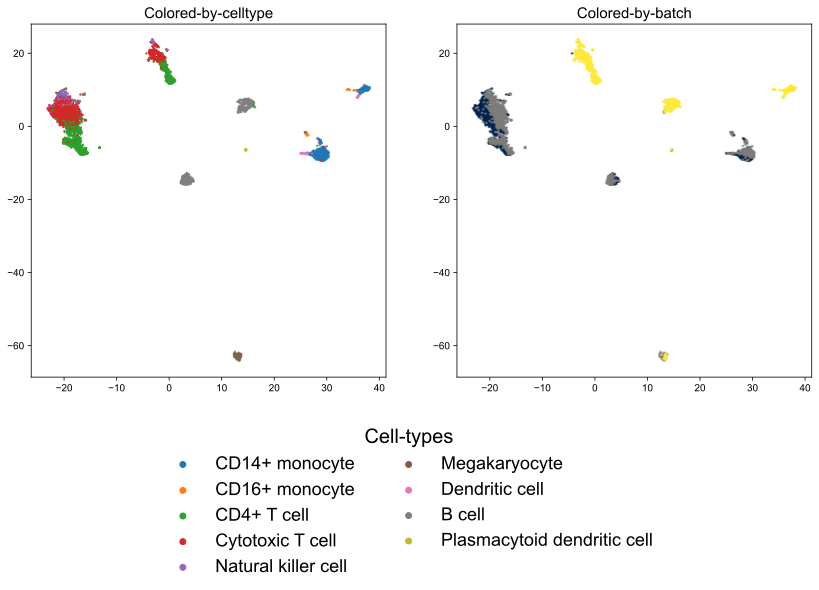

In [20]:
tsne_glmpca = tsne_for_pca(pca_glmpca)

Standard deviation of embedding is greater than 0.0001. Initial embeddings with high variance may have display poor convergence.


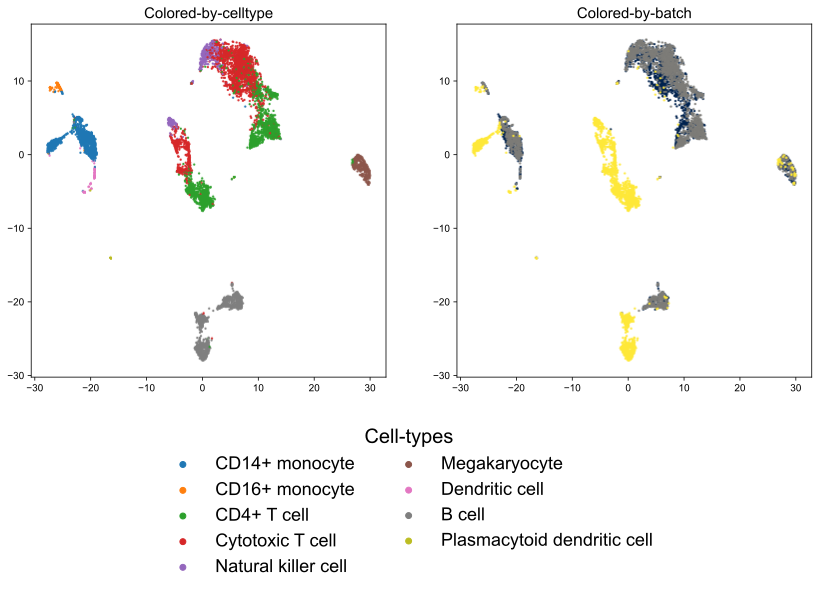

In [13]:
tsne_logpca = tsne_for_pca(pca_logpca)

Standard deviation of embedding is greater than 0.0001. Initial embeddings with high variance may have display poor convergence.


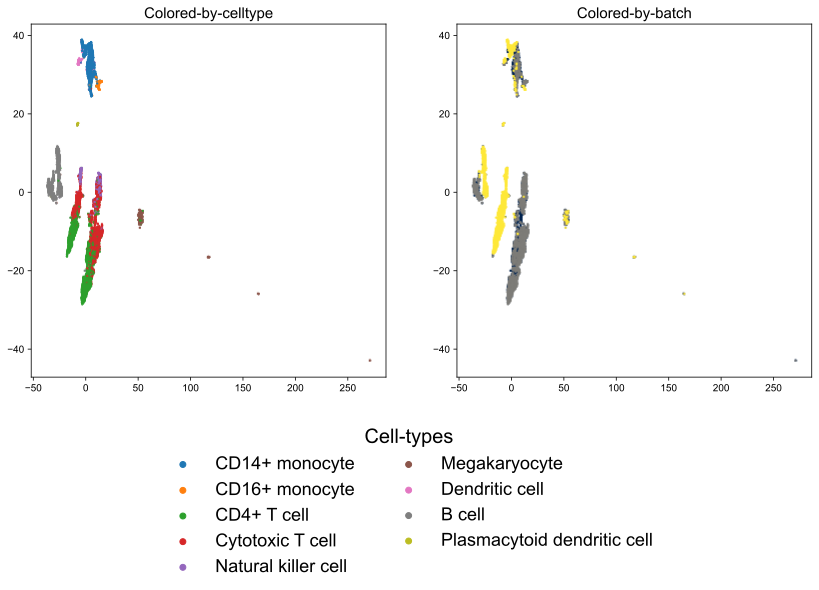

In [14]:
tsne_logpca = tsne_for_pca(pca_fr)

# Runtime - pbmcssc

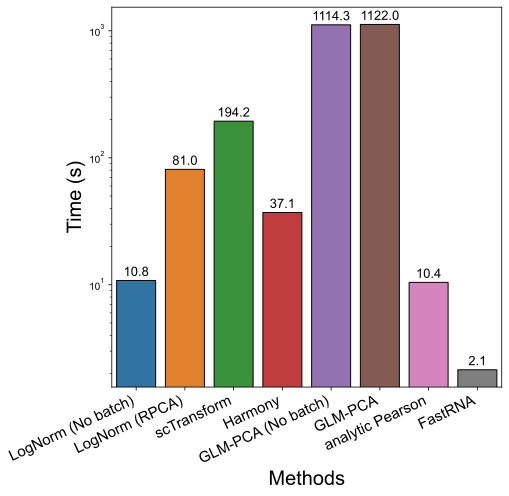

In [15]:
names = ['LogNorm (No batch)', 'LogNorm (RPCA)', 'scTransform', 'Harmony',
        'GLM-PCA (No batch)', 'GLM-PCA', 'analytic Pearson', 'FastRNA']
times = [10.804, 81.031, 194.176, 37.08, 
        1114.301, 1121.989, 10.434, 2.139]

fig, ax = plt.subplots(figsize=(7,7))
df_time = pd.DataFrame({'Methods': names, 'Time (s)': times})
sns.barplot(x='Methods', y='Time (s)', data=df_time, edgecolor='black')

ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=25, ha='right')
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
ax.set_yscale('log')
ax.bar_label(ax.containers[0], fontsize=13, padding=2, fmt='%.1f')

plt.show()